In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_parquet('data.parquet')

In [5]:
df.head()

,Subject,Sender,Date,Body,RepliedTo,embedding
0,"VINEET, Remember To Purchase Your Getaway Star...",Hilton Grand Vacations <hgv@travel2.hiltongran...,1.683869e+09,Your 3-Night Vacation Can Get You $100 Towards...,0,"[-0.008335459977388382, -0.007523390464484692,..."
1,Spring Recital next Saturday May 20th at 5:00,Andrew Bushnell <fiddlersroof@outlook.com>,1.683868e+09,,0,"[-0.03298372030258179, 0.0026079996023327112, ..."
2,[Class of 2028] Save the date - 7th Grade End ...,Tushar Gupta <m@mail1.veracross.com>,1.683867e+09,"Hello class of 2028 families, \r\nWe are plann...",0,"[-0.008779299445450306, -0.004117605742067099,..."
3,[Mantri Celestia] Special Notice: Power Shutdo...,Mantri Celestia helpdesk <donotreply@apnacompl...,1.683866e+09,,0,"[-0.00916092749685049, -0.021061832085251808, ..."
4,We're Giving You Up to 40% Off Sale Styles,Banana Republic <bananarepublic@email.bananare...,1.683864e+09,\r\n\r\nWe're Giving You Up to 40% Off Sale St...,0,"[-0.046990904957056046, -0.01633710041642189, ..."


In [6]:
df['embedding'] = df.embedding.apply(np.array)

df.head()

,Subject,Sender,Date,Body,RepliedTo,embedding
0,"VINEET, Remember To Purchase Your Getaway Star...",Hilton Grand Vacations <hgv@travel2.hiltongran...,1.683869e+09,Your 3-Night Vacation Can Get You $100 Towards...,0,"[-0.008335459977388382, -0.007523390464484692,..."
1,Spring Recital next Saturday May 20th at 5:00,Andrew Bushnell <fiddlersroof@outlook.com>,1.683868e+09,,0,"[-0.03298372030258179, 0.0026079996023327112, ..."
2,[Class of 2028] Save the date - 7th Grade End ...,Tushar Gupta <m@mail1.veracross.com>,1.683867e+09,"Hello class of 2028 families, \r\nWe are plann...",0,"[-0.008779299445450306, -0.004117605742067099,..."
3,[Mantri Celestia] Special Notice: Power Shutdo...,Mantri Celestia helpdesk <donotreply@apnacompl...,1.683866e+09,,0,"[-0.00916092749685049, -0.021061832085251808, ..."
4,We're Giving You Up to 40% Off Sale Styles,Banana Republic <bananarepublic@email.bananare...,1.683864e+09,\r\n\r\nWe're Giving You Up to 40% Off Sale St...,0,"[-0.046990904957056046, -0.01633710041642189, ..."


In [7]:
X_train, X_test, y_train, y_test = train_test_split(list(df.embedding.values), df.RepliedTo.values, test_size=0.2, random_state=42)

In [8]:
regressor = LogisticRegression(max_iter=1000)
regressor.fit(X_train, y_train)

rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
knn_preds = knn.predict(X_test)
rfr_preds = rfr.predict(X_test)
regressor_preds = regressor.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_preds)}')
print(f'KNN F1: {f1_score(y_test, knn_preds)}')

print(f'Random Forest Accuracy: {accuracy_score(y_test, rfr_preds)}')
print(f'Random Forest F1: {f1_score(y_test, rfr_preds)}')

print(f'Logistic Regression Accuracy: {accuracy_score(y_test, regressor_preds)}')
print(f'Logistic Regression F1: {f1_score(y_test, regressor_preds)}')

KNN Accuracy: 0.9377162629757786
KNN F1: 0.9423076923076924
Random Forest Accuracy: 0.9480968858131488
Random Forest F1: 0.9508196721311476
Logistic Regression Accuracy: 0.916955017301038
Logistic Regression F1: 0.9225806451612903


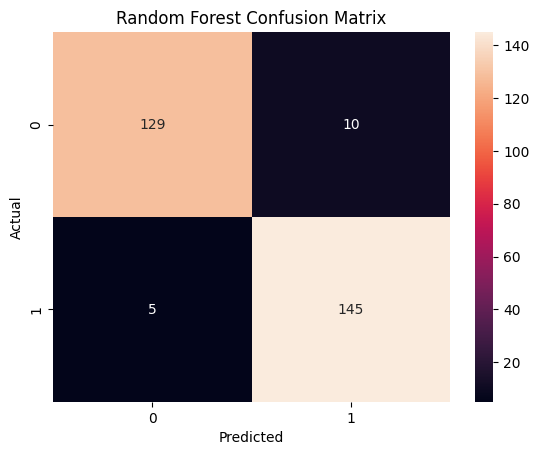

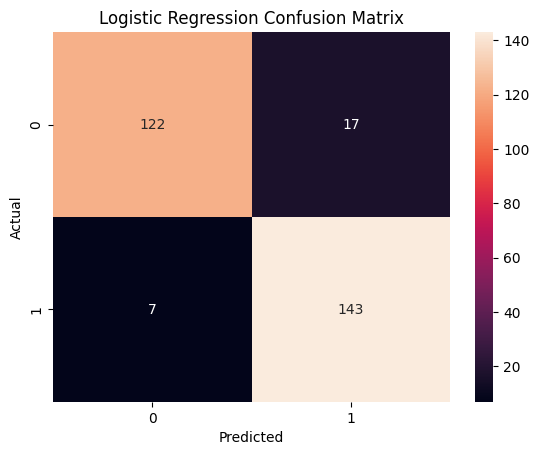

In [15]:
#make confusion matrices for both random forest and logistic regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rfr_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

cm = confusion_matrix(y_test, regressor_preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [14]:
#return a prediction from the random forest classifiers that includes the probability of the prediction
rfr.predict_proba(X_test)

#print the prediction for each email and its probability
for i in range(len(X_test)):
	#print the second value of the prediction array, which is the probability of the email being replied to
	print(rfr.predict_proba(X_test)[i][1])

0.32
0.09
0.91
0.38
0.95
0.38
0.33
0.89
0.39
0.29
0.43
0.9
1.0
0.92
0.75
0.71
0.28
0.05
0.92
0.65
0.43
0.29
0.27
0.93
1.0
0.91
0.13
0.84
0.19
0.3
0.55
0.29
0.35
0.37
0.74
0.36
0.37
0.42
0.76
0.11
0.11
0.61
0.59
0.58
0.99
0.74
0.43
0.82
0.26
0.67
0.54
0.73
0.77
0.34
0.55
0.24
0.92
0.61
0.98
0.19
0.06
0.68
0.74
0.12
0.97
0.64
0.64
0.18
0.89
0.87
0.71
0.91
0.93
0.25
0.38
0.4
0.04
0.94
0.62
0.93
0.91
0.24
0.9
0.2
0.24
0.81
0.94
0.15
0.39
0.49
0.89
0.73
0.19
0.28
0.86
0.69
0.26
0.89
0.16
0.65
0.13
0.87
0.28
0.96
0.69
0.9
0.72
0.91
0.98
0.11
1.0
0.62
0.71
1.0
0.7
0.9
0.26
0.1
0.34
0.78
0.15
0.33
0.49
0.21
0.82
0.29
0.13
0.16
0.87
0.82
0.2
0.96
0.35
0.64
0.72
0.9
0.9
0.19
0.75
0.61
0.37
0.91
0.18
0.34
0.22
0.34
0.19
0.16
0.17
0.23
0.07
0.4
0.78
0.8
0.91
0.35
0.27
0.7
0.16
0.33
0.82
0.3
0.05
0.96
0.37
0.19
0.73
0.81
0.35
0.81
0.31
0.72
0.89
0.3
0.35
0.79
0.67
0.16
0.22
0.9
0.14
0.16
0.92
0.74
0.2
0.51
0.83
0.65
0.59
0.13
0.17
0.89
0.25
0.37
0.88
0.22
0.19
0.39
0.26
0.28
0.78
0.96
0.37
0.75
0.4